# DAQA Workshop

In [1]:
# for data mgmt
import json
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

# for plotting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from matplotlib.colors import to_rgba

# for hypothesis testing
from scipy.stats import chi2_contingency
from scipy.stats import pareto

import warnings
warnings.filterwarnings("ignore")

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df_daqa_event=pd.read_json("./data/daqa_event_level_202211220114.json")
df_daqa_org=pd.read_json("./data/daqa_organization_level_202211220114.json")
df_daqa_person=pd.read_json("./data/daqa_person_level_202211220114.json")
df_daqa_place=pd.read_json("./data/daqa_place_level_202211220114.json")
df_daqa_recognition=pd.read_json("./data/daqa_recognition_level_202211220114.json")
df_daqa_reference=pd.read_json("./data/daqa_reference_level_202211220114.json")
df_daqa_relationship=pd.read_json("./data/daqa_relationship_level_202211220114.json")
df_daqa_work=pd.read_json("./data/daqa_work_level_202211220114.json")

## DAQA Events

In [3]:
# df_daqa_event.head(1).T
print(f'There are {df_daqa_event.shape[0]} event records.')
# df_daqa_event[['ori_id','title','_class','relationships','related_people','related_references']].tail(5)

There are 21 event records.


## DAQA Organisations

In [4]:
# df_daqa_org.head(1).T
print(f'There are {df_daqa_org.shape[0]} organisation records.')
# df_daqa_org[['ori_id','primary_name','_type','_class','operation',
#              'relationships','related_people',
#              'related_works','related_recognitions','related_organizations',
#              'is_australian']].tail(5)

There are 957 organisation records.


       firm  education  organisation  government
_type   897         39            15           6 



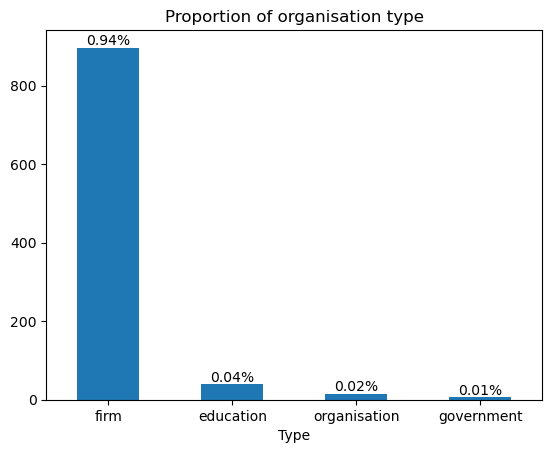

In [5]:
# bar chart of organisation type
type_freq = pd.DataFrame(df_daqa_org['_type'].value_counts())
print(type_freq.T,'\n')

df = type_freq\
    .reset_index()\
    .rename({'index':'Type',
             '_type':'Frequency'}, axis=1)
labels = (df['Frequency']/df_daqa_org.shape[0])\
        .round(2).astype('str') + '%'

ax = df.plot.bar(x='Type', y='Frequency', rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend
ax.legend().set_visible(False)

plt.title('Proportion of organisation type')
plt.show()

## DAQA Persons

In [6]:
# df_daqa_person.head(1).T
print(f'There are {df_daqa_person.shape[0]} person records.')
# df_daqa_person[['ori_id','primary_name','_class',
#              'education_experiences','career','birth','death','gender',
#              'alternative_names','primary_name', 'display_name',
#              'is_architect','is_practiceInQueensland','longterm_roles']].tail(5)

There are 934 person records.


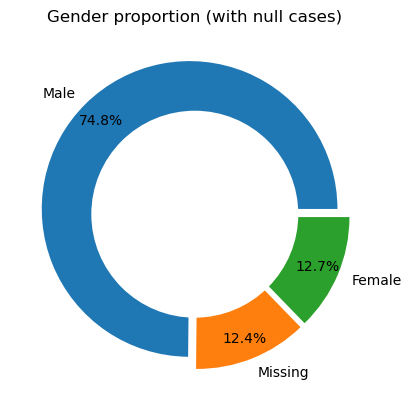

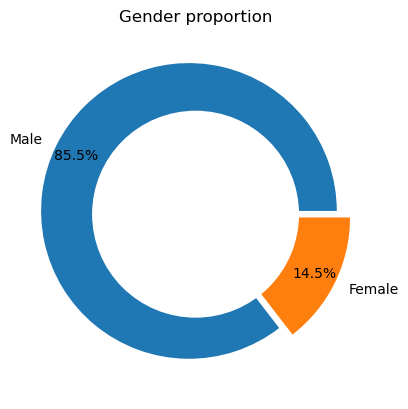

In [7]:
## Gender Proportion
df_gender=pd.DataFrame(dict(Counter(df_daqa_person["gender"])).items(),
                              columns=["Gender","Frequency"])

# explosion
explode = (0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender['Frequency'], labels=['Male','Missing','Female'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion (with null cases)')
  
# Displaying Chart
plt.show()

# without null
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender[~df_gender['Gender'].isnull()]['Frequency'], labels=['Male','Female'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion')
  
# Displaying Chart
plt.show()

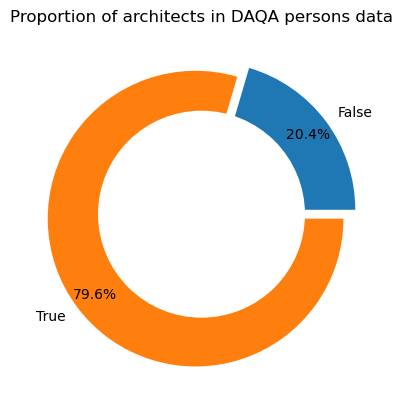

In [8]:
# Proportion of is_architect field 
df_isarch=pd.DataFrame(dict(Counter(df_daqa_person["is_architect"])).items(),
                              columns=["is_architect","Frequency"])

# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_isarch['Frequency'], labels=df_isarch['is_architect'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Proportion of architects in DAQA persons data')
  
# Displaying Chart
plt.show()

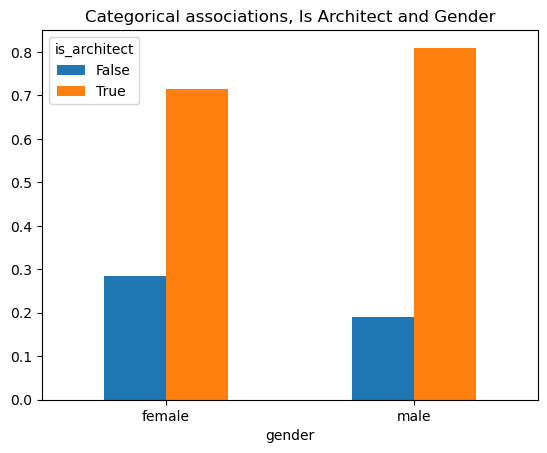

p value: 0.024


In [9]:
# categorical associations  - gender and is_architect
pd.crosstab(df_daqa_person['gender'], 
            df_daqa_person['is_architect'], normalize='index')\
.plot(kind='bar', rot=0)

plt.title('Categorical associations, Is Architect and Gender')
plt.show()

print("p value: " + str(round(chi2_contingency([[34, 85], [133, 566]])[1],3)))

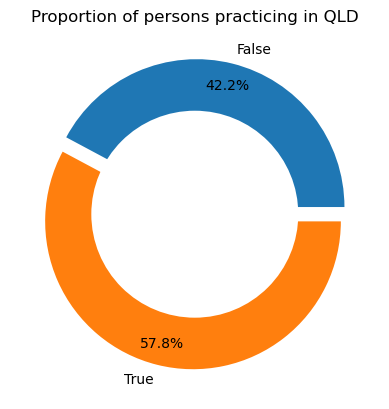

In [10]:
# Proportion of architects practicing in Queensland
df_isarchfromqld=pd.DataFrame(dict(Counter(df_daqa_person["is_practiceInQueensland"])).items(),
                              columns=["is_practiceInQueensland","Frequency"])
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_isarchfromqld['Frequency'], 
        labels=df_isarchfromqld['is_practiceInQueensland'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Proportion of persons practicing in QLD')
  
# Displaying Chart
plt.show()

### Education experiences

In [11]:
# inspect data
ee_df = pd.DataFrame()
for ii,ee in enumerate(df_daqa_person['education_experiences']):
    if ee is None: continue
    if len(ee):
        this_ee = pd.json_normalize(ee)
        this_ee['display_name'] = df_daqa_person.iloc[ii]['display_name']
        ee_df = ee_df.append(this_ee)

# remove incomplete and remove rows with no completion dates
ee_df = ee_df[ee_df['coverage_range.date_range.date_end'] != 'incomplete']
ee_df = ee_df[~ee_df['coverage_range.date_range.date_end'].isnull()]

# remove rows with no qualification data
ee_df = ee_df[~ee_df['school.qualification'].isnull()]
ee_df = ee_df[ee_df['school.qualification'] != 'INCOMPLETE']

# remove rows with no school name
ee_df = ee_df[~ee_df['school.name'].isnull()]

# remove case of honorary doctorates
ee_df = ee_df[ee_df['school.name'] != 'QUT, UQ']

# remove redundant columns
ee_df = ee_df.drop(['school.type','coverage_range.date_range.date_start'],axis=1)
                  
# fix missing place name
ee_df.loc[ee_df['school.name'] == 'CAMBRIDGE','coverage_range.place'] = 'UK'
    
# fix anomalies
ee_df = ee_df[~ee_df.display_name.isin(['Bruce Goodsir', 'Donald Watson', 
                                        'Dorothy Brennan','Malcolm Bunzli', 
                                        'Robyn Hesse','Edward James Archibald Weller',
                                        'Lilly Addison', 'Richard Allom'])]
    
# Summary statistics
# display(HTML(ee_df.describe().to_html()))
print(f'There are {ee_df.shape[0]} person records with education data.')
print('Summary statistics')

ee_df.describe()

# # Missing data
# print('\nMissing data')
# ee_df.isnull().sum()

There are 210 person records with education data.
Summary statistics


,school.name,school.qualification,coverage_range.place,coverage_range.date_range.date_end,display_name
count,210,210,210,210,210
unique,51,42,22,86,163
top,UQ,DipArch,QLD,1955,Robert Riddel
freq,78,76,138,8,4


In [12]:
# clean qualification data
ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['BACHELOR OF ARCHITECTURE',
                                                'BA','B.ARCH','BArch hons']),
                                         'BArch',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['BA SCIENCE(BOTANY)',
                                                'BA Town Planning','BA Larch',
                                                'BA Design Studies',
                                                'BA Design','BA Design',
                                                'BAppSci','BA (?) Town Planning']),
                                         'Bachelor (Other)',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['Diploma','DIPLOMA',
                                                'DIP Arch','DIPLOMA OF ARCHITECTURE',
                                                'DipA']),
                                         'DipArch',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['GradDip Uni Planning',
                                                'GradDip Project Management',
                                                'Grad Dip Town Planning',
                                                'Gdip Urban Planning',
                                                'GradDip landscape','Grad Dip Landscape']),
                                         'GDip (Other)',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['Grad Dip']),
                                         'GDipArch',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['M.A.ARCHITECTURE']),
                                         'MArch',ee_df['school.qualification'])


ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['MA Town Planning','MBA',
                                                'MA App Sc','MA Education',
                                                'MArts','MArts (Urban design)',
                                                'Masters in Art','M.Litt',
                                                'MA Urban Studies']),
                                         'Masters (Other)',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['PhD (hon)','PHD',]),
                                         'PhD',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['CERT','certificate',
                                                'CERTIFICATE OF ARCHITECTURE']),
                                         'CertArch',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['CERTIFICATE OF TOWN PLANNING',
                                                'Cert Art&Design']),
                                         'Cert (Other)',ee_df['school.qualification'])

ee_df['school.qualification'] = np.where(ee_df['school.qualification']
                                         .isin(['CERTIFICATE OF TOWN PLANNING',
                                                'Cert Art&Design']),
                                         'Cert (Other)',ee_df['school.qualification'])

topquals = pd.DataFrame(ee_df['school.qualification'].value_counts())\
            .reset_index()\
            .rename({'index':'Qualification','school.qualification':'Frequency'}, axis=1)\
            .head(10)['Qualification']\
            .values

ee_df['school.qualification'] = np.where(~ee_df['school.qualification'].isin(topquals), 
                                'Unknown',ee_df['school.qualification'])

ee_df['school.qualification2'] = ee_df['school.qualification']
ee_df['school.qualification2'] = np.where(ee_df['school.qualification'].str.contains('B'),
                                          'Bachelor',ee_df['school.qualification2'])
ee_df['school.qualification2'] = np.where(ee_df['school.qualification'].str.contains('M'),
                                          'Masters',ee_df['school.qualification2'])
ee_df['school.qualification2'] = np.where(ee_df['school.qualification'].str.contains('GDip'),
                                          'Graduate Diploma',ee_df['school.qualification2'])
ee_df['school.qualification2'] = np.where(ee_df['school.qualification'].str.contains('Cert'),
                                          'Certificate',ee_df['school.qualification2'])
ee_df['school.qualification2'] = np.where(ee_df['school.qualification']=='DipArch',
                                          'Diploma',ee_df['school.qualification2'])

In [13]:
# clean place/school data
ee_df['coverage_range.place'] = np.where(((ee_df['coverage_range.place'] == 'VIC') &
                                         (ee_df['school.name'] == 'UQ')) |
                                         ((ee_df['coverage_range.place'] == 'MELBOURNE') &
                                         (ee_df['school.name'] == 'UQ')) |
                                         (ee_df['coverage_range.place'] == 'Qld') |
                                         (ee_df['coverage_range.place'] == 'Qld') |
                                         (ee_df['coverage_range.place'] == 'qld') |
                                         (ee_df['coverage_range.place'] == 'UNI'),
                                         'QLD',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'MELBOURNE'),
                                         'VIC',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'SYDNEY') |
                                         (ee_df['coverage_range.place'] == 'Colle'),
                                         'NSW',ee_df['coverage_range.place'])
                                          
ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'USA') |
                                         (ee_df['coverage_range.place'] == 'New York') |
                                         (ee_df['coverage_range.place'] == 'CANADA'), 
                                'USA',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'AUCKLAND'), 
                                'NZ',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'Scotland'), 
                                'SCOTLAND',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'LONDON') | 
                                         (ee_df['coverage_range.place'] == 'SCOTLAND') |
                                         (ee_df['coverage_range.place'] == 'Indep') |
                                         (ee_df['coverage_range.place'] == 'England'), 
                                'UK',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'Vienna, Austria') |
                                         (ee_df['coverage_range.place'] == 'VIENNA') |
                                         (ee_df['coverage_range.place'] == 'Vienna') |
                                         (ee_df['coverage_range.place'] == 'Vienna Austria') |
                                         (ee_df['coverage_range.place'] == 'Vienna, AUSTRIA'), 
                                         'Other (Europe)',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'Norway') |
                                         (ee_df['coverage_range.place'] == 'MILAN') |
                                         (ee_df['coverage_range.place'] == 'Rome') |
                                         (ee_df['coverage_range.place'] == 'SLOVAKIA') |
                                         (ee_df['coverage_range.place'] == 'Hungary') |
                                         (ee_df['coverage_range.place'] == 'Cech') |
                                         (ee_df['coverage_range.place'] == 'GERMANY'), 
                                         'Other (Europe)',ee_df['coverage_range.place'])

ee_df['coverage_range.place'] = np.where((ee_df['coverage_range.place'] == 'GUADALAJARA') |
                                         (ee_df['coverage_range.place'] == 'SOUTH AFRICA') |
                                         (ee_df['coverage_range.place'] == 'INDIA'), 
                                         'Other (Rest of World)',ee_df['coverage_range.place'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'UoM'), #data entry error
                                'UQ',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'BCTC/UQ') |
                                (ee_df['school.name'] == 'BCTC?UQ') |
                                (ee_df['school.name'] == 'CTC') |
                                (ee_df['school.name'] == 'BRISBANE CENTRAL TECHNICAL COLLEGE'), 
                                'BCTC',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'Sydney') |
                                (ee_df['school.name'] == 'SYDNEY UNI') |
                                (ee_df['school.name'] == 'Sydney University'), 
                                'USYD',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'Melb') |
                                (ee_df['school.name'] == 'Melbourne') |
                                (ee_df['school.name'] == 'UNI OF MELBOURNE') |
                                (ee_df['school.name'] == 'MELBOURNE'), 
                                'UoM',ee_df['school.name'])

ee_df['coverage_range.place'] = np.where((ee_df['school.name'] == 'UoM'), 
                                'VIC',ee_df['coverage_range.place'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'SYDNEY TECHNICAL COLLEGE'), 
                                'STC',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'EAST SYDNEY TECH COLLEGE AND TOWN PLANNING'), 
                                'ESTC',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'Melb TC'), 
                                'MTC',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'HAVARD GRAD SCH OF DESIGN') |
                                (ee_df['school.name'] == 'HAVARD UNI'), 
                                'Harvard',ee_df['school.name'])

ee_df['school.name'] = np.where((ee_df['school.name'] == 'articled') |
                                (ee_df['school.name'] == 'articles') | 
                                (ee_df['school.name'] == 'Articled Pup') |
                                (ee_df['school.name'] == 'Articled'), 
                                'Articled',ee_df['school.name'])

# ee_df['school.name'] = np.where(((ee_df['coverage_range.place'] == 'UK') &
#                                 (ee_df['school.name'] != 'AA')), 
#                                 'Other (UK)',ee_df['school.name'])

# ee_df['school.name'] = np.where((ee_df['coverage_range.place'] == 'USA/Canada'), 
#                                 'Other (USA)',ee_df['school.name'])

# topplaces = pd.DataFrame(ee_df['coverage_range.place'].value_counts())\
#             .reset_index()\
#             .rename({'index':'Place','coverage_range.place':'Frequency'}, axis=1)\
#             .head(9)['Place']\
#             .values

# ee_df['coverage_range.place'] = np.where(~ee_df['coverage_range.place'].isin(topplaces), 
#                                 'Other',ee_df['coverage_range.place'])

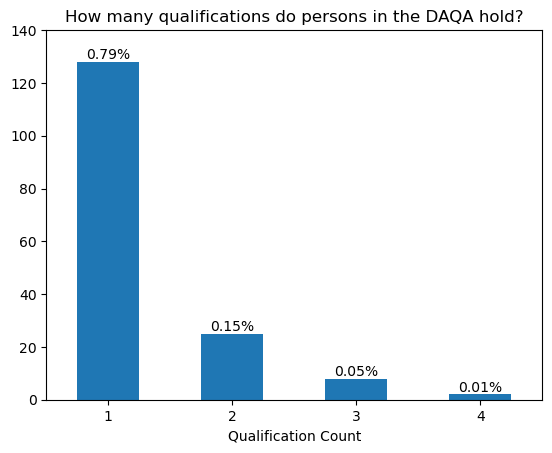

In [14]:
## bar chart of number of qualifications
df_persons_with_qual = pd.DataFrame(ee_df['display_name'].value_counts())\
                            .reset_index()\
                            .rename({'index':'Person',
                                     'display_name':'Frequency'}, axis=1)

df = pd.DataFrame(df_persons_with_qual['Frequency']\
        .value_counts())\
        .reset_index()\
        .rename({'index':'Qualification Count'}, axis=1)

labels = (df['Frequency']/df_persons_with_qual.shape[0])\
        .round(2).astype('str') + '%'

ax = df.plot.bar(x='Qualification Count', y='Frequency',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)

plt.title('How many qualifications do persons in the DAQA hold?')
plt.ylim([0, 140])
plt.show()

# use to check people with multiple qualifications
# ee_df[(ee_df['display_name']\
#       .isin(df_persons_with_qual[df_persons_with_qual.Frequency > 2]['Person']\
#       .values))]\
#       .sort_values(['display_name','coverage_range.date_range.date_end'])

#### Person records with three education qualifications
- Balwant Saini (BArch, BArch, PhD)
- Blair Wilson (BArch, DipArch, Graduate Diploma)
- Gordon Holden (DipArch, Masters ,PhD)
- Graham de Gruchy (BArch, Masters ,PhD)
- Janet Conrad (BArch, Bachelor, Masters)
- Karl Langer (CertArch, DipArch, PhD)
- Peter Skinner (Bachelor, BArch, MArch)
- Robert Riddel (DipArch, Masters, DipArch, PhD)
- Steven Szokolay (BArch, MArch, PhD)

#### Person records with four education qualifications
- Barbara van den Broek (DipArch, Graduate Diploma, Graduate Diploma, Masters)

In [15]:
# keep last education record
ee_df_last = ee_df\
.sort_values(['coverage_range.date_range.date_end','display_name'])\
.drop_duplicates(subset='display_name', keep="last")

print(f'There are {ee_df_last.shape[0]} (unique) person records with education data.')

There are 163 (unique) person records with education data.


                       Diploma  Bachelor  Masters  PhD  Graduate Diploma  \
school.qualification2       71        61       12    8                 7   

                       Certificate  
school.qualification2            4   



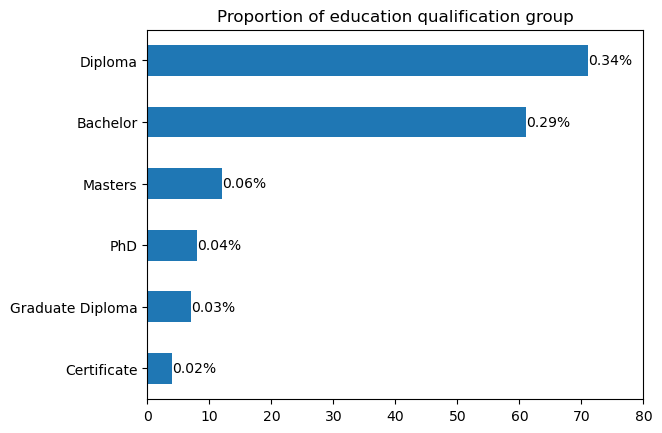

In [16]:
# bar chart of qualification type
ee_freq = pd.DataFrame(ee_df_last['school.qualification2'].value_counts())
print(ee_freq.T,'\n')

df = ee_freq\
    .reset_index()\
    .rename({'index':'Qualification Type',
             'school.qualification2':'Frequency'}, axis=1)\
    .sort_values('Frequency')

df = df[~df['Qualification Type'].isin(['Unknown'])]

labels = (df['Frequency']/ee_df.shape[0])\
        .round(2).astype('str') + '%'

ax = df.plot.barh(x='Qualification Type', y='Frequency',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)
plt.title('Proportion of education qualification group')

plt.xlim([0, 80])
plt.show()

                      DipArch  BArch  PhD  MArch  Masters (Other)  GDipArch  \
school.qualification       71     60    8      6                6         4   

                      GDip (Other)  CertArch  Cert (Other)  Bachelor (Other)  
school.qualification             3         3             1                 1   



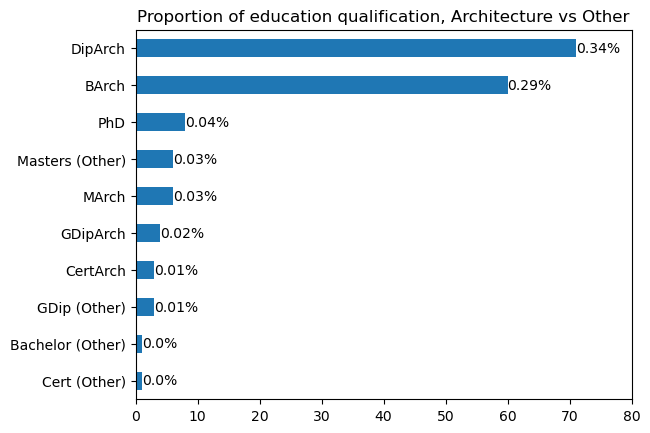

In [17]:
# bar chart of qualification
ee_freq = pd.DataFrame(ee_df_last['school.qualification'].value_counts()).head(10)
print(ee_freq.T,'\n')

df = ee_freq\
    .reset_index()\
    .rename({'index':'Qualification',
             'school.qualification':'Frequency'}, axis=1)\
    .sort_values('Frequency')

df = df[~df['Qualification'].isin(['Unknown'])]

# df['Colour'] = np.where(df['Place'].isin(['QLD','VIC','NSW','TAS']),'orange','steelblue')

labels = (df['Frequency']/ee_df.shape[0])\
        .round(2).astype('str') + '%'

ax = df.plot.barh(x='Qualification', y='Frequency',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)
plt.title('Proportion of education qualification, Architecture vs Other')

plt.xlim([0, 80])
plt.show()

                      QLD  NSW  UK  USA  VIC  Other (Europe)  NZ
coverage_range.place  124   12  11    6    5               4   1 



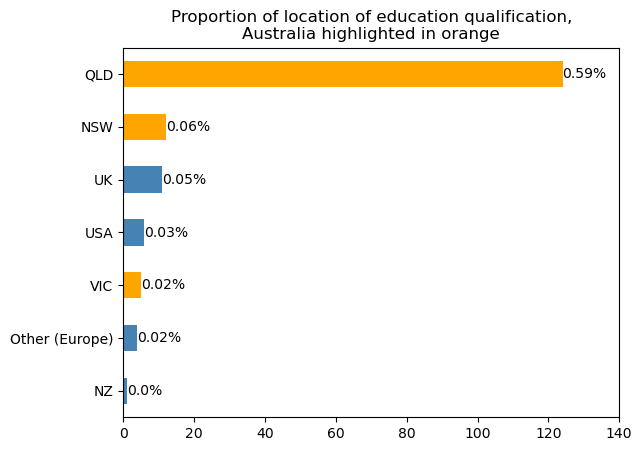

In [18]:
# bar chart of location of education institution
ee_freq = pd.DataFrame(ee_df_last['coverage_range.place'].value_counts())
print(ee_freq.T,'\n')

df = ee_freq\
    .reset_index()\
    .rename({'index':'Place',
             'coverage_range.place':'Frequency'}, axis=1)\
    .sort_values('Frequency')

df['Colour'] = np.where(df['Place'].isin(['QLD','VIC','NSW','TAS']),'orange','steelblue')

labels = (df['Frequency']/ee_df.shape[0])\
        .round(2).astype('str') + '%'

ax = df.plot.barh(x='Place', y='Frequency', color=df['Colour'].values ,rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)
plt.title('Proportion of location of education qualification,\nAustralia highlighted in orange')

plt.xlim([0, 140])
plt.show()

             UQ  BCTC  QIT  QUT  AA  USYD  UoM  Harvard  STC
school.name  64    36   13    9   6     6    4        3    2 



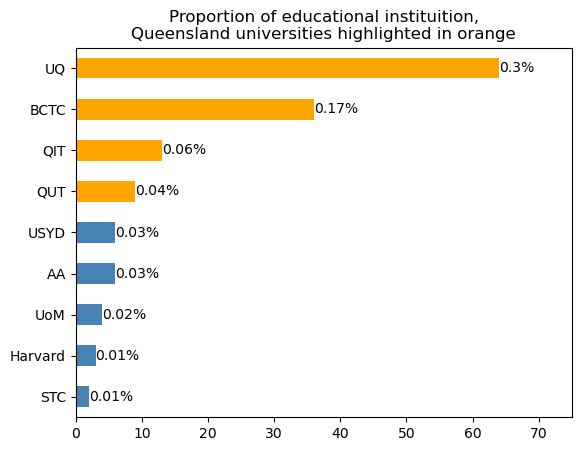

In [19]:
# bar chart of education institution
ee_freq = pd.DataFrame(ee_df_last['school.name'].value_counts()).head(9)
print(ee_freq.T,'\n')

df = ee_freq\
    .reset_index()\
    .rename({'index':'School Name',
             'school.name':'Frequency'}, axis=1)\
    .sort_values('Frequency')

# df = df[~df['School Name'].isin(['Articled','NOT IN DAQA'])]

labels = (df['Frequency']/ee_df.shape[0])\
        .round(2).astype('str') + '%'

df['Colour'] = np.where(df['School Name']\
                        .isin(['UQ','BCTC','QIT','QUT']),
                        'orange','steelblue')

ax = df.plot.barh(x='School Name', y='Frequency', 
                  color=df['Colour'].values, rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend
ax.legend().set_visible(False)
plt.ylabel(None)

plt.title('Proportion of educational instituition,\nQueensland universities highlighted in orange')

plt.xlim([0, 75])
plt.show()

##### Notes:
- University of Queensland (UQ)
- Brisbane Central Technical College (BCTC) 
    - founded in 1908, originally called The College
    - built from 1911 to 1956
    - became QIT in 1965
    - was not able to grant bachelor degrees until 1987
    - became QUT in 1987
- Architectural Association School of Architecture (AA)
    - Based in the UK, est. 1847
    - considered one of the most prestigious and competitive in the world
- Sydney Technical College (STC)
    - a.k.a TAFE New South Wales Sydney Institute
    - technical school est. in 1878
    - superceded the Sydney Mechanics' School of Arts

#### Education over time

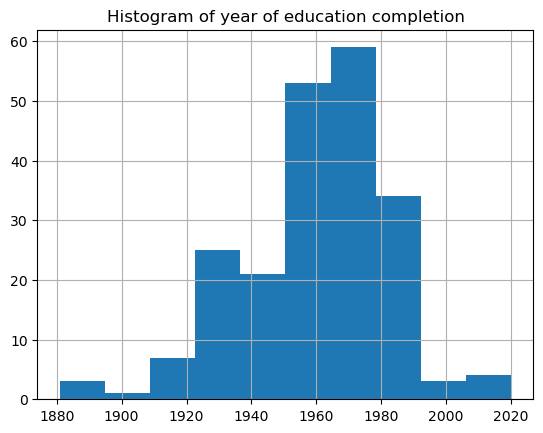

In [20]:
## Histogram of year of education completion
ee_df['coverage_range.date_range.date_end'] = ee_df['coverage_range.date_range.date_end']\
                                              .apply(lambda x: x[0:4])\
                                              .astype(int)
ee_df['coverage_range.date_range.date_end'].hist()

plt.title('Histogram of year of education completion')
plt.show()

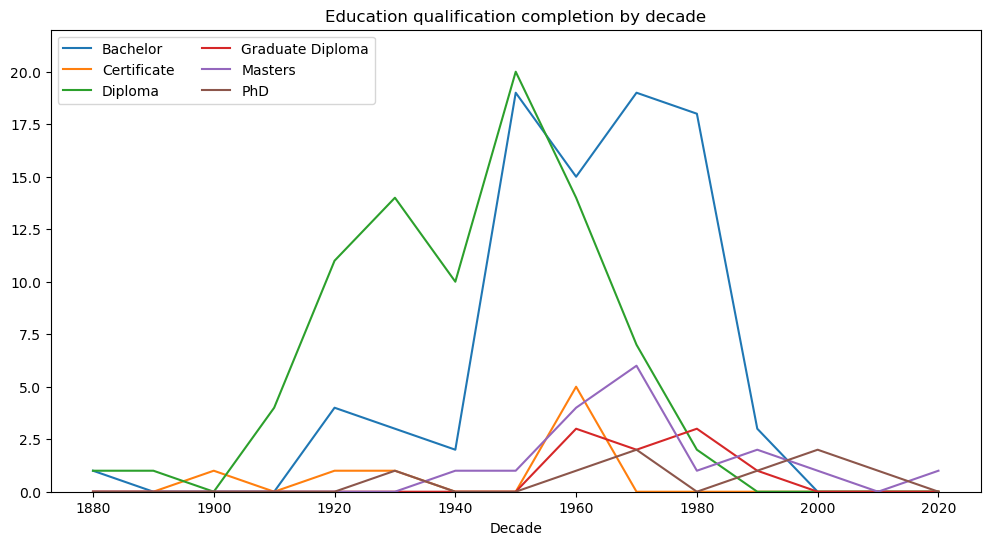

In [21]:
## line chart by decade of education completion
ee_df['date_end_decade'] = [ int(np.floor(int(year)/10) * 10) 
                            for year in np.array(ee_df['coverage_range.date_range.date_end'])]

ax = pd.crosstab(ee_df['date_end_decade'],
            ee_df['school.qualification2'])\
.plot(rot=0, figsize=(12,6))

# adjust legend
ax.legend(loc="upper left", ncol=2)

plt.xlabel('Decade')
plt.ylim([0, 22])

plt.title('Education qualification completion by decade')
plt.show()

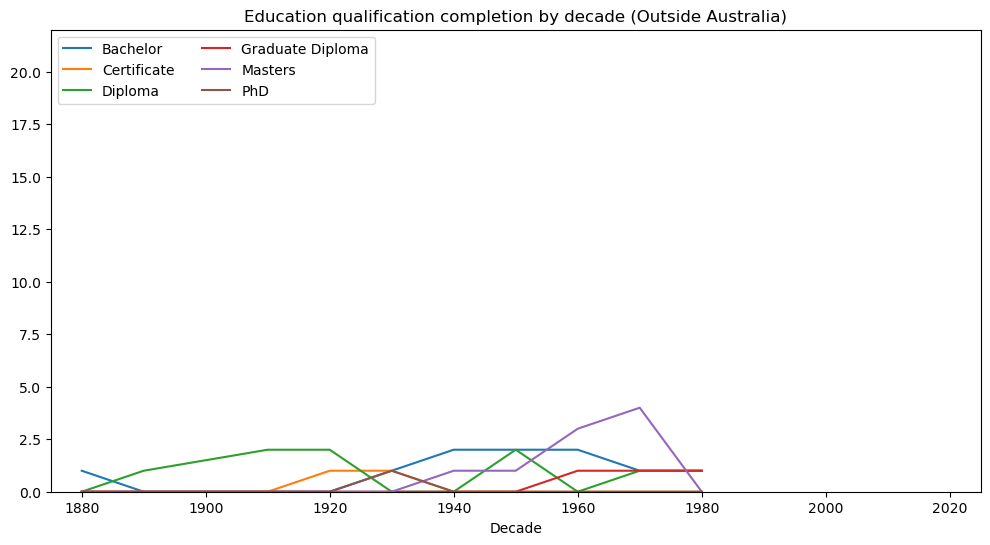

In [22]:
# line chart by decade of education completion (outside AUS)
ee_df_notqld = ee_df[~ee_df['coverage_range.place'].isin(['QLD','TAS','NSW','VIC'])]

ax = pd.crosstab(ee_df_notqld['date_end_decade'],
            ee_df_notqld['school.qualification2'])\
.plot(rot=0, figsize=(12,6))

# adjust legend
ax.legend(loc="upper left", ncol=2)

plt.xlabel('Decade')
plt.xlim([1875, 2025])
plt.ylim([0, 22])

plt.title('Education qualification completion by decade (Outside Australia)')
plt.show()

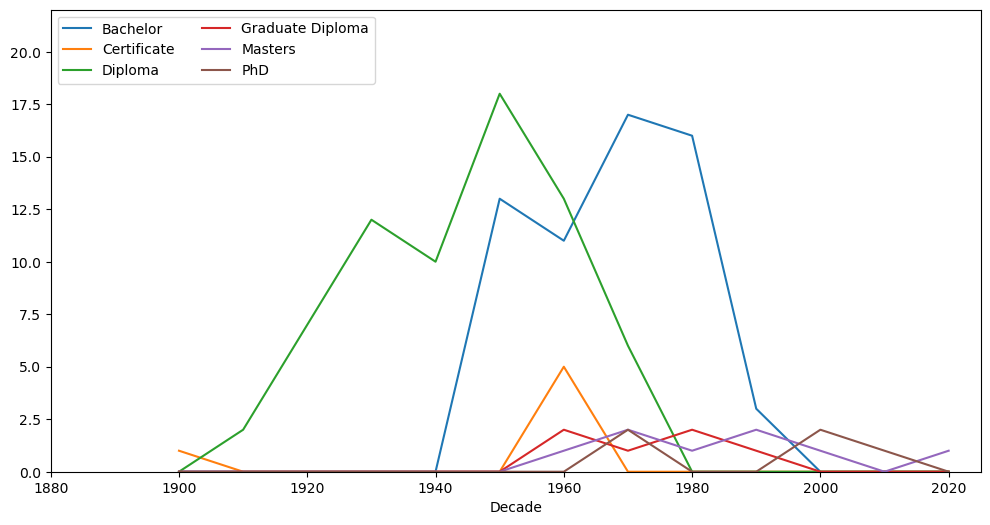

In [23]:
# line chart by decade of education completion (only queensland)
ee_df_qld = ee_df[ee_df['coverage_range.place'].isin(['QLD'])]

ax = pd.crosstab(ee_df_qld['date_end_decade'],
            ee_df_qld['school.qualification2'])\
.plot(rot=0, figsize=(12,6))

# adjust legend
ax.legend(loc="upper left", ncol=2)

plt.xlabel('Decade')
plt.xlim([1880, 2025])
plt.ylim([0, 22])
plt.show()

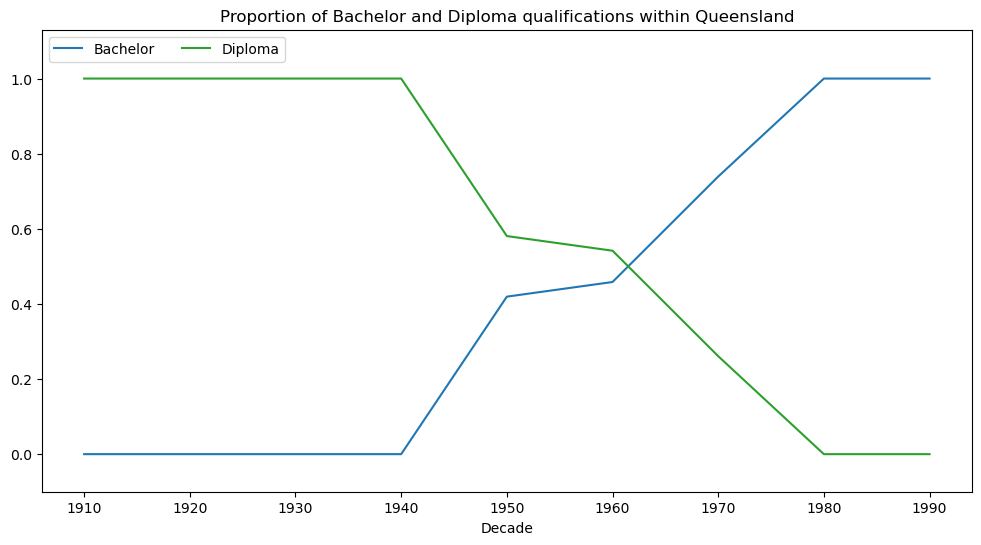

In [24]:
# bachelor/diploma proportion over decade (only queensland)
ee_df2 = ee_df[(ee_df['school.qualification2'].isin(['Bachelor','Diploma'])) &
               (ee_df['coverage_range.place'].isin(['QLD']))]

ax = pd.crosstab(ee_df2['date_end_decade'],
            ee_df2['school.qualification2'], normalize='index')\
.plot(rot=0, figsize=(12,6), color=['tab:blue','tab:green'])

# adjust legend
ax.legend(loc="upper left", ncol=2)

plt.xlabel('Decade')
plt.ylim([-0.1, 1.13])

plt.title('Proportion of Bachelor and Diploma qualifications within Queensland')
plt.show()

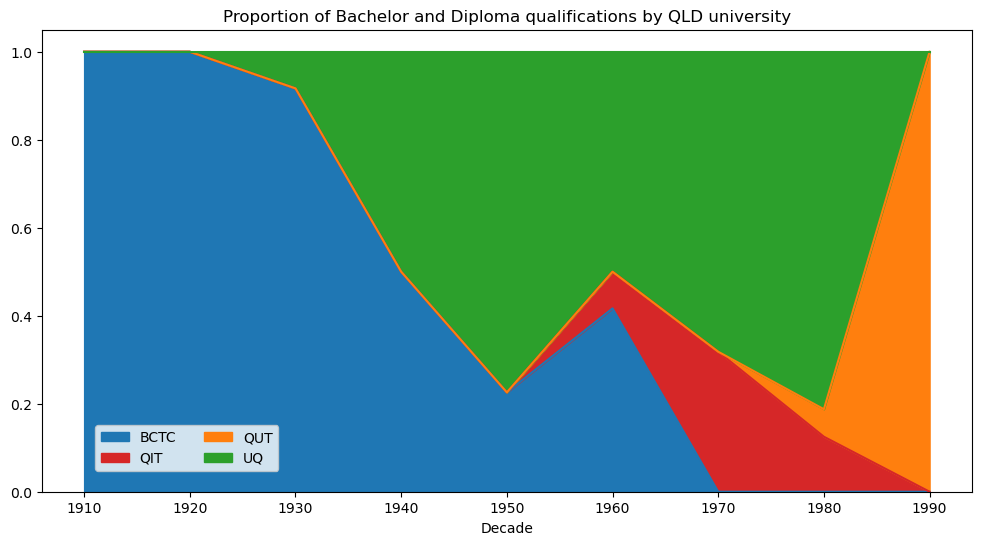

In [25]:
# bachelor/diploma over decade by qld institutions
ee_df2 = ee_df[(ee_df['school.qualification2'].isin(['Bachelor','Diploma'])) &
               (ee_df['coverage_range.place'].isin(['QLD'])) &
               (~ee_df['school.name'].isin(['Townsville TC']))]

ax = pd.crosstab(ee_df2['date_end_decade'],
                 ee_df2['school.name'],normalize='index')\
.plot(kind='area',stacked=True,rot=0, figsize=(12,6), 
      color=['tab:blue','tab:red',
             'tab:orange','tab:green'])

# adjust legend
ax.legend(loc="lower left", ncol=2, bbox_to_anchor=(0.05, 0.03))

plt.xlabel('Decade')
plt.title('Proportion of Bachelor and Diploma qualifications by QLD university')
plt.show()

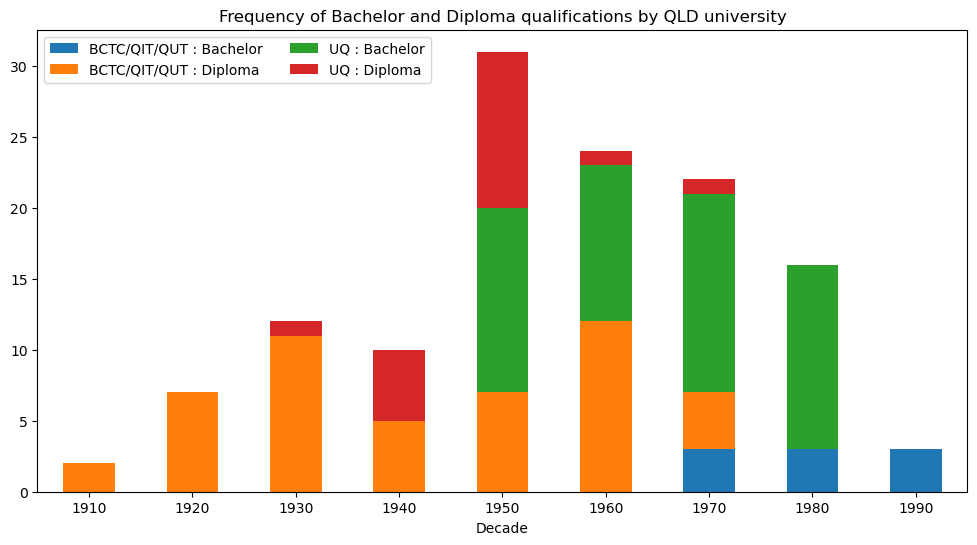

In [26]:
# bachelor/diploma over decade by qld institutions, summarised
ee_df2['main_qld_unis'] = np.where(ee_df2['school.name'].isin(['BCTC','QUT','QIT']),
                                   'BCTC/QIT/QUT', ee_df2['school.name'])
ee_df2['main_qld_unis'] = ee_df2['main_qld_unis'] + ' : ' + ee_df2['school.qualification2']

ax = pd.crosstab(ee_df2['date_end_decade'],
                 ee_df2['main_qld_unis'])\
.plot(kind='bar',stacked=True,rot=0, figsize=(12,6))

# adjust legend
ax.legend(loc="upper left", ncol=2)

plt.xlabel('Decade')
plt.title('Frequency of Bachelor and Diploma qualifications by QLD university')
plt.show()

## DAQA Places

In [27]:
# df_daqa_place.head(1).T
print(f'There are {df_daqa_place.shape[0]} place records.')
# df_daqa_place[['ori_id','_class','display_name']].tail(5)

There are 19 place records.


## DAQA Recognition

In [28]:
# df_daqa_place.head(1).T
print(f'There are {df_daqa_recognition.shape[0]} recognition records.')
# df_daqa_recognition[['ori_id','title','_type','_class']].tail(5)

There are 27 recognition records.


## DAQA Reference

In [29]:
# df_daqa_place.head(1).T
print(f'There are {df_daqa_reference.shape[0]} reference records.')
# df_daqa_reference[['ori_id','title','_type','_class']].tail(5)

There are 913 reference records.


## DAQA Relationships

In [30]:
# df_daqa_place.head(1).T
print(f'There are {df_daqa_relationship.shape[0]} relationship records.')
# df_daqa_relationship[['ori_id','title','_type','_class']].tail(5)

There are 10543 relationship records.


#### Persons with related work

In [31]:
# clean data
df_daqa_completions = df_daqa_relationship[~df_daqa_relationship['objectcompletion'].isnull()]
df_daqa_completions_bypersons = df_daqa_completions[df_daqa_completions['relation_class'].isin(['Person_Relatedwork'])]
df_daqa_completions_bypersons['predicate_term'] = df_daqa_completions_bypersons['predicate'].apply(lambda x: x['term'])
df_daqa_completions_bypersons = df_daqa_completions_bypersons[df_daqa_completions_bypersons.predicate_term == 'WorkedOn']

In [32]:
# inspect data
ee_df = pd.DataFrame()
for ii,ee in df_daqa_completions_bypersons.iterrows():
    uniqueid = ee['subject_ori_url'] + '-' + ee['object_ori_url']
    this_ee_subject = pd.json_normalize(ee['subject'])
    this_ee_subject['uniqueid'] = uniqueid
    this_ee_object = pd.json_normalize(ee['object'])
    this_ee_object['uniqueid'] = uniqueid
    this_ee = pd.merge(this_ee_subject,this_ee_object, on='uniqueid')
    this_ee['typology'] = ee['typology']
    this_ee['objectcompletion'] = ee['objectcompletion']
    ee_df = ee_df.append(this_ee)

                      0             1            2             3
Person     Lange Powell  Robin Gibson  John Dalton  Graham Bligh
Frequency           141            69           65            57


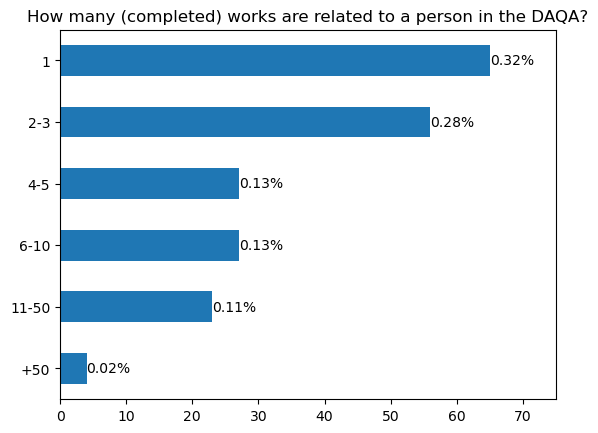

In [33]:
# bar chart of related works frequency
ee_freq = pd.DataFrame(ee_df['label_x'].value_counts())
ee_df = pd.merge(ee_df,ee_freq.reset_index().rename({'index':'label_x','label_x':'Frequency'}, axis=1))
topfour = ee_freq['label_x'].reset_index().head(4)
topfour_arch = topfour['index'].values
print(topfour.rename({'index':'Person','label_x':'Frequency'}, axis=1).T)

df = pd.DataFrame(ee_freq\
                 .reset_index()\
                 .rename({'index':'Person',
                         'label_x':'Frequency'}, axis=1))['Frequency']\
                .value_counts()

df2 = pd.DataFrame(df\
             .reset_index()\
             .rename({'index':'RelatedWorksFrequency',
                      'label_x':'Frequency'}, axis=1))

df2['RelatedWorksFrequency2'] = np.where((df2['RelatedWorksFrequency'] < 2), df2['RelatedWorksFrequency'],
                                np.where((df2['RelatedWorksFrequency'] <= 3),'2-3',
                                np.where((df2['RelatedWorksFrequency'] <= 5),'4-5',
                                np.where((df2['RelatedWorksFrequency'] <= 10),'6-10',
                                np.where((df2['RelatedWorksFrequency'] <= 50),'11-50','+50')))))

ee_df = pd.merge(ee_df,df2.reset_index()[['RelatedWorksFrequency','RelatedWorksFrequency2']]\
                 .rename({'RelatedWorksFrequency':'Frequency'}, axis=1))

df3 = df2.groupby('RelatedWorksFrequency2')['Frequency']\
        .sum()\
        .reset_index()\
        .sort_values('Frequency', ascending=True)

labels = (df3['Frequency']/df3['Frequency'].sum())\
        .round(2).astype('str') + '%'

ax = df3.reindex([0,2,5,4,3,1]).plot.barh(x='RelatedWorksFrequency2', y='Frequency',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)

plt.xlim([0, 75])
plt.title('How many (completed) works are related to a person in the DAQA?')
plt.show()

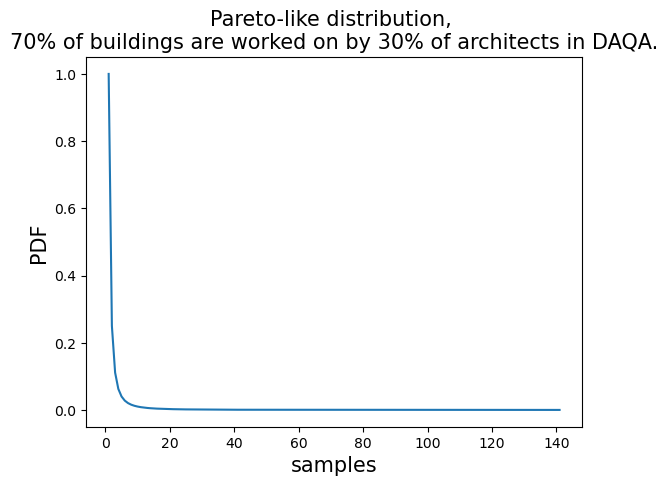

In [34]:
#check for pareto principle
samples = ee_df['label_x'].value_counts()
output = np.array([pareto.pdf(x=samples, b=1, loc=0, scale=1)])
plt.plot(samples, output.T, label='alpha {0}' .format(1))
    
plt.xlabel('samples', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Pareto-like distribution, \n70% of buildings are worked on by 30% of architects in DAQA.', fontsize=15)
# plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
# plt.legend(loc='best')
plt.show()

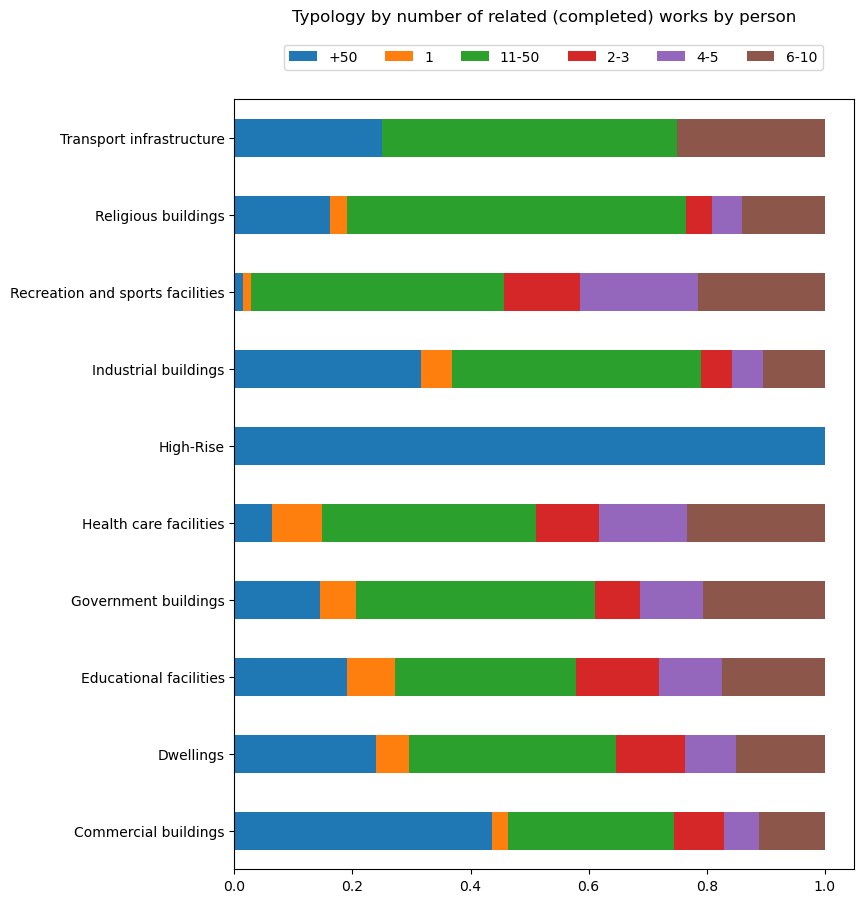

In [35]:
# categorical associations - typology and completed projects
ax = pd.crosstab(ee_df['typology'], 
            ee_df['RelatedWorksFrequency2'], normalize='index')\
.plot(kind='barh', rot=0, stacked=True, figsize=(8,10))

ax.legend(loc="upper right", ncol=6, bbox_to_anchor=(0.96, 1.08))
plt.ylabel(None)

plt.title('Typology by number of related (completed) works by person\n\n\n\n')
plt.show()

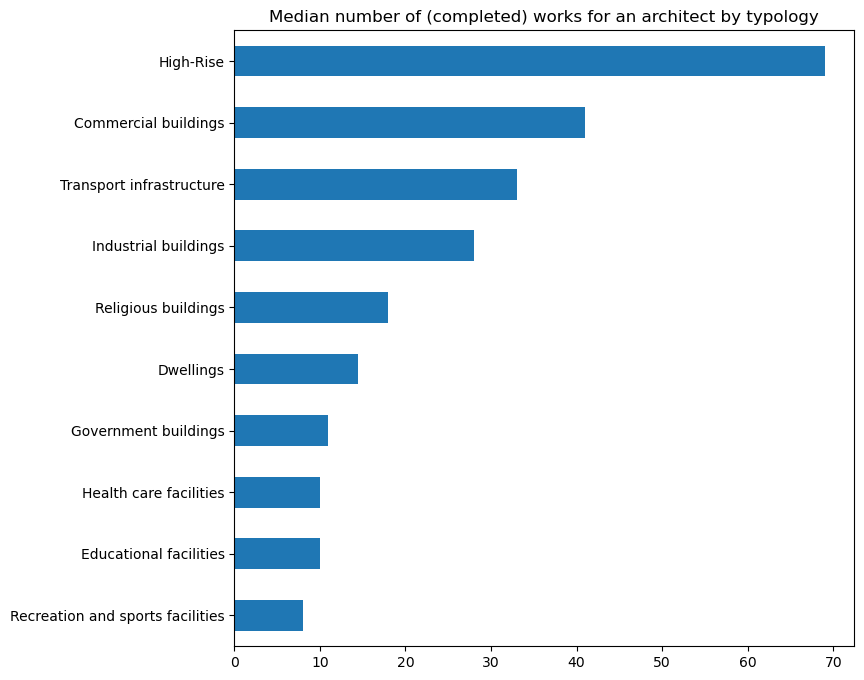

In [36]:
# Median number of completions for an architect by typology
ax=ee_df.groupby('typology')['Frequency'].median().reset_index().sort_values('Frequency',ascending=True)\
.plot('typology','Frequency',kind='barh',rot=0, figsize=(8,8))

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)

plt.title('Median number of (completed) works for an architect by typology')
plt.show()

In [37]:
# over 50/under 50
# ee_df['RelatedWorksFrequency3'] = np.where(ee_df['RelatedWorksFrequency2'] == '+50', 'Over 50', 'Under 50')
# ax = pd.crosstab(ee_df['typology'], 
#             ee_df['RelatedWorksFrequency3'], normalize='index')\
# .plot(kind='barh', rot=0, stacked=True)

# ax.legend(loc="upper right", ncol=1, bbox_to_anchor=(1.22, 1.02))
# plt.show()

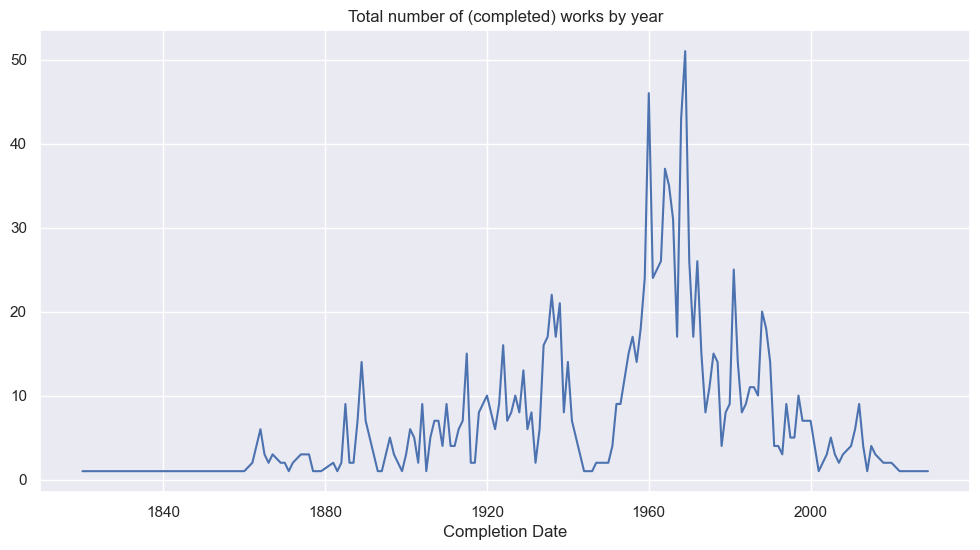

In [38]:
# total completions over time
# ee_df["objectcompletion_asdt"] = ee_df["objectcompletion"].apply(func)
ee_df["objectcompletion_asdt"] = ee_df["objectcompletion"].apply(lambda x: x[0:4])
ee_df["objectcompletion_asdt"] = ee_df["objectcompletion_asdt"]\
.apply(lambda x: datetime.strptime(x, '%Y'))

total_completions=ee_df['objectcompletion_asdt']\
.value_counts()\
.reset_index()\
.rename({'index':'Completion Date','objectcompletion_asdt':'Frequency'}, axis=1)\
.sort_values('Completion Date')

sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(data=total_completions, x="Completion Date", y="Frequency")

# remove legend
plt.ylabel(None)

plt.title('Total number of (completed) works by year')
plt.show()

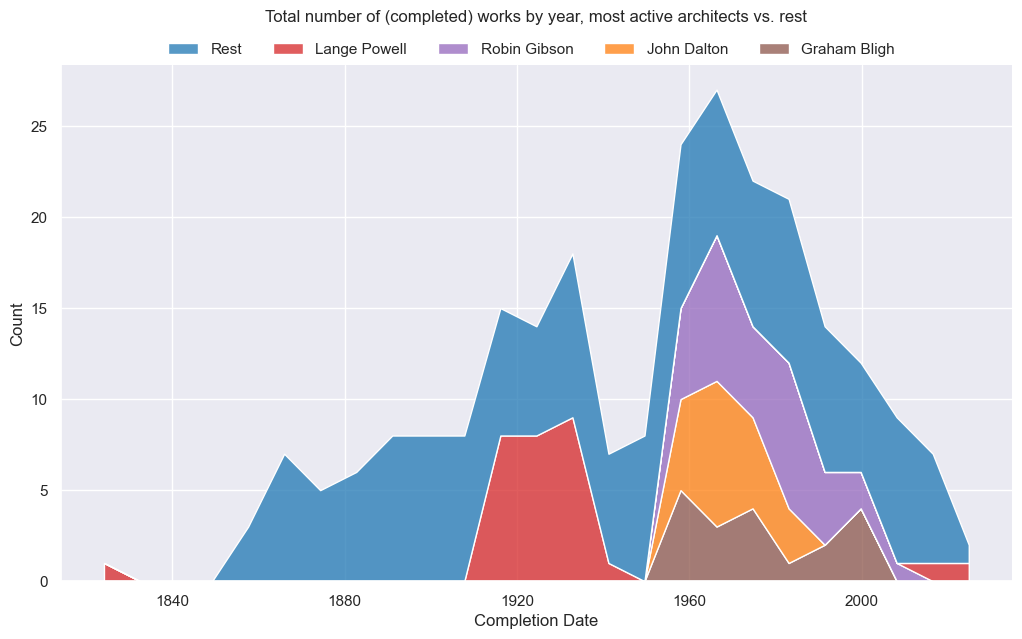

In [39]:
# total four (individually) vs rest over time
sns.set(rc={'figure.figsize':(12,6)})

rest_completions = ee_df[~ee_df['label_x']\
                        .isin(topfour_arch)]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
rest_completions[''] = 'Rest'

lp_completions = ee_df[ee_df['label_x']\
                        .isin(['Lange Powell'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
lp_completions[''] = 'Lange Powell'

rg_completions = ee_df[ee_df['label_x']\
                        .isin(['Robin Gibson'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
rg_completions[''] = 'Robin Gibson'

jd_completions = ee_df[ee_df['label_x']\
                        .isin(['John Dalton'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
jd_completions[''] = 'John Dalton'

gb_completions = ee_df[ee_df['label_x']\
                        .isin(['Graham Bligh'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
gb_completions[''] = 'Graham Bligh'

color_dict = {'Lange Powell': to_rgba('tab:red', 0.3),
              'Robin Gibson': to_rgba('tab:purple', 0.3),
              'John Dalton': to_rgba('tab:orange', 0.3),
              'Graham Bligh': to_rgba('tab:brown', 0.3),
              'Rest': to_rgba('tab:blue', 0.1)}

allcompletions = rest_completions.append(lp_completions)
allcompletions = allcompletions.append(rg_completions)
allcompletions = allcompletions.append(jd_completions)
allcompletions = allcompletions.append(gb_completions)
# allcompletions["Completion Date"] = allcompletions["Completion Date"].apply(func)


ax = sns.displot(allcompletions, x='Completion Date', kind='hist',bins=25,height=6,aspect=1.75,
            hue="", fill=True, palette = color_dict, element="poly", multiple="stack")

sns.move_legend(ax, "upper center", ncol=5, bbox_to_anchor=(0.45, 1.03))
# plt.ylim([0, 50])
plt.title('Total number of (completed) works by year, most active architects vs. rest\n\n')
plt.show()

#### Organisations with related works

In [40]:
# inspect data
df_daqa_completions_byorg = df_daqa_completions[df_daqa_completions['relation_class'].isin(['Organization_Relatedwork'])]

ee_df = pd.DataFrame()
for ii,ee in df_daqa_completions_byorg.iterrows():
    uniqueid = ee['subject_ori_url'] + '-' + ee['object_ori_url']
    this_ee_subject = pd.json_normalize(ee['subject'])
    this_ee_subject['uniqueid'] = uniqueid
    this_ee_object = pd.json_normalize(ee['object'])
    this_ee_object['uniqueid'] = uniqueid
    this_ee = pd.merge(this_ee_subject,this_ee_object, on='uniqueid')
    this_ee['typology'] = ee['typology']
    this_ee['objectcompletion'] = ee['objectcompletion']
    ee_df = ee_df.append(this_ee)

                                          0  \
Person     Bligh Jessup Bretnall & Partners   
Frequency                                62   

                                            1                        2  \
Person     John Dalton Architect & Associates  Robin Gibson & Partners   
Frequency                                  57                       46   

                               3            4  
Person     Karl Langer Architect  Hall & Dods  
Frequency                     41           36  


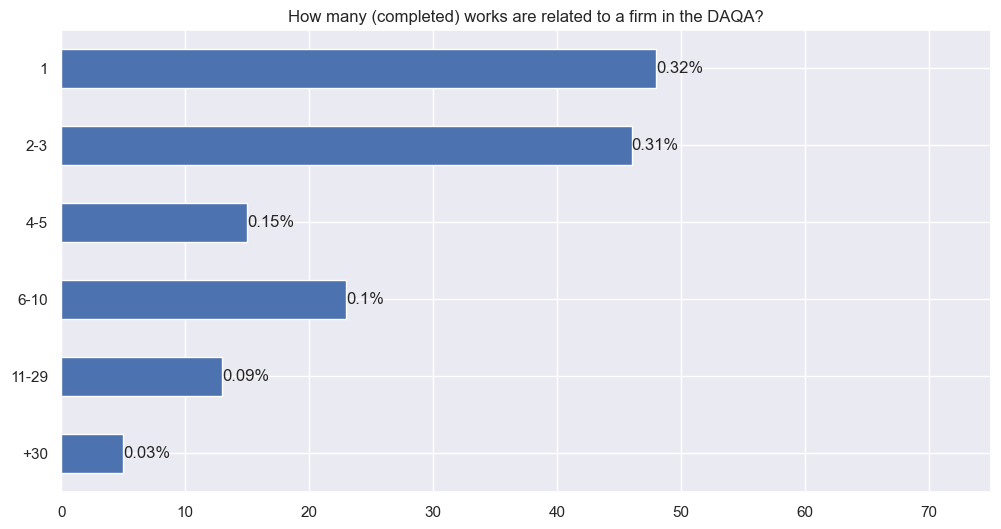

In [41]:
# bar chart of related works frequency
ee_freq = pd.DataFrame(ee_df['label_x'].value_counts())
ee_df = pd.merge(ee_df,ee_freq.reset_index().rename({'index':'label_x','label_x':'Frequency'}, axis=1))
topfour = ee_freq['label_x'].reset_index().head(5)
topfour_arch = topfour['index'].values
print(topfour.rename({'index':'Person','label_x':'Frequency'}, axis=1).T)

df = pd.DataFrame(ee_freq\
                 .reset_index()\
                 .rename({'index':'Person',
                         'label_x':'Frequency'}, axis=1))['Frequency']\
                .value_counts()

df2 = pd.DataFrame(df\
             .reset_index()\
             .rename({'index':'RelatedWorksFrequency',
                      'label_x':'Frequency'}, axis=1))

df2['RelatedWorksFrequency2'] = np.where((df2['RelatedWorksFrequency'] < 2), df2['RelatedWorksFrequency'],
                                np.where((df2['RelatedWorksFrequency'] <= 3),'2-3',
                                np.where((df2['RelatedWorksFrequency'] <= 5),'4-5',
                                np.where((df2['RelatedWorksFrequency'] <= 10),'6-10',
                                np.where((df2['RelatedWorksFrequency'] <= 30),'11-29','+30')))))

ee_df = pd.merge(ee_df,df2.reset_index()[['RelatedWorksFrequency','RelatedWorksFrequency2']]\
                 .rename({'RelatedWorksFrequency':'Frequency'}, axis=1))

df3 = df2.groupby('RelatedWorksFrequency2')['Frequency']\
        .sum()\
        .reset_index()\
        .sort_values('Frequency', ascending=True)

labels = (df3['Frequency']/df3['Frequency'].sum())\
        .round(2).astype('str') + '%'

ax = df3.reindex([0,2,5,4,3,1]).plot.barh(x='RelatedWorksFrequency2', y='Frequency',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)

plt.xlim([0, 75])
plt.title('How many (completed) works are related to a firm in the DAQA?')
plt.show()

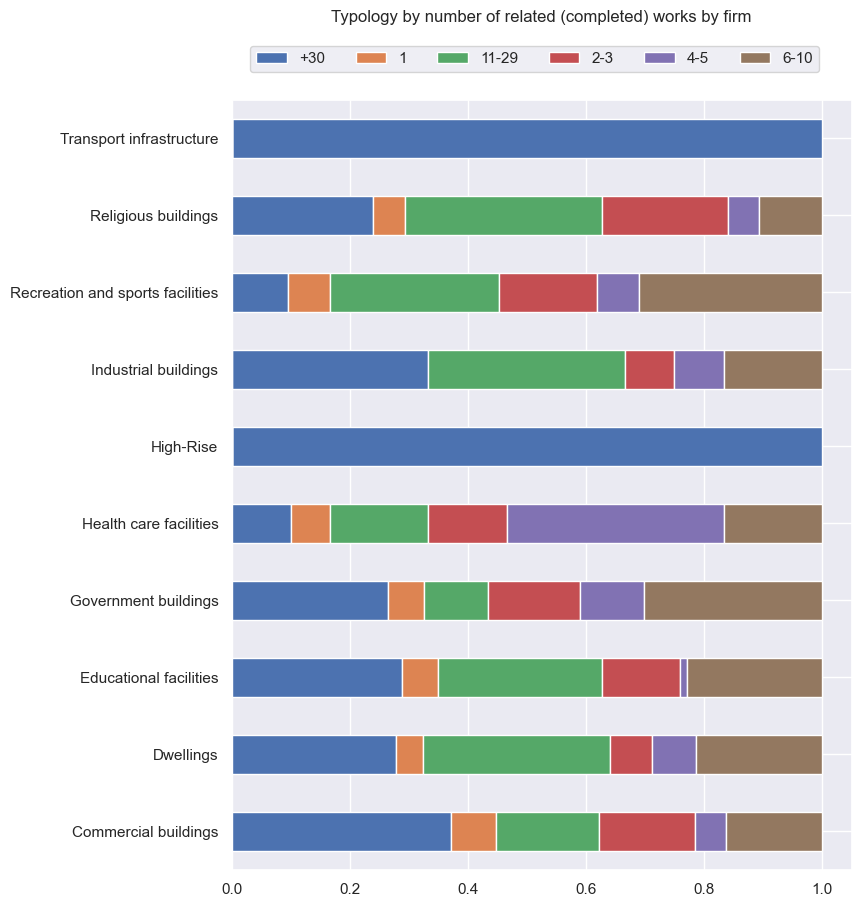

In [42]:
# categorical associations - typology and completed projects
ax = pd.crosstab(ee_df['typology'], 
            ee_df['RelatedWorksFrequency2'], normalize='index')\
.plot(kind='barh', rot=0, stacked=True, figsize=(8,10))

ax.legend(loc="upper right", ncol=6, bbox_to_anchor=(0.96, 1.08))
plt.ylabel(None)
plt.title('Typology by number of related (completed) works by firm\n\n\n\n')
plt.show()

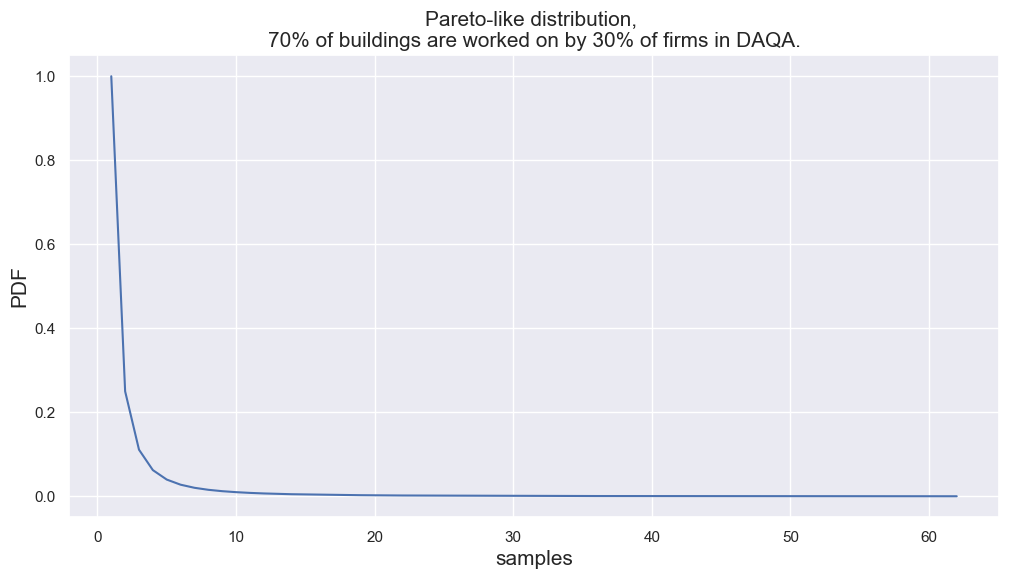

In [43]:
#check for pareto principle
samples = ee_df['label_x'].value_counts()
output = np.array([pareto.pdf(x=samples, b=1, loc=0, scale=1)])
plt.plot(samples, output.T, label='alpha {0}' .format(1))
    
plt.xlabel('samples', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Pareto-like distribution, \n70% of buildings are worked on by 30% of firms in DAQA.', fontsize=15)
# plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
# plt.legend(loc='best')
plt.show()

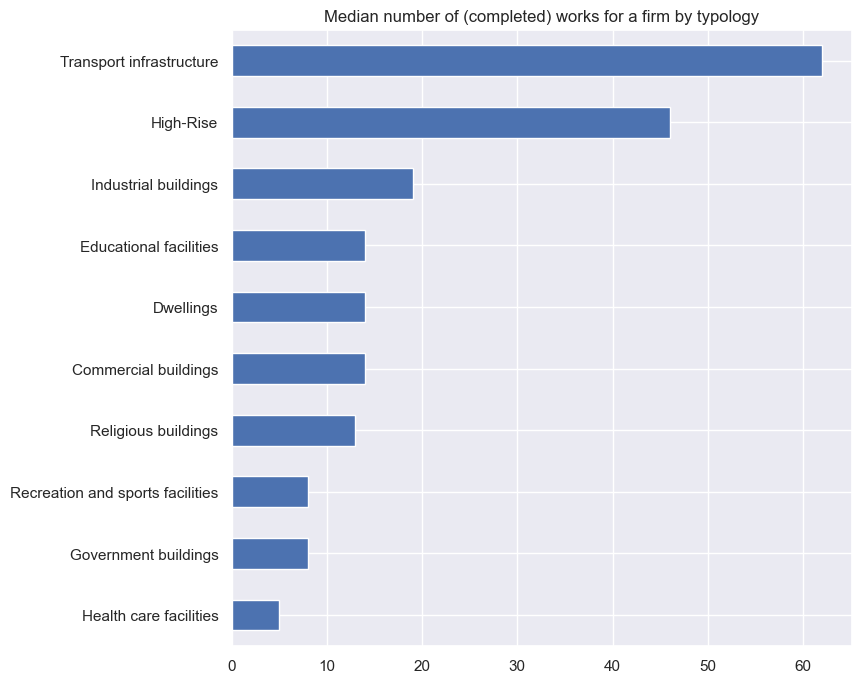

In [44]:
# Median number of completions for an architect by typology
ax=ee_df.groupby('typology')['Frequency'].median().reset_index().sort_values('Frequency',ascending=True)\
.plot('typology','Frequency',kind='barh',rot=0, figsize=(8,8))

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)
plt.title('Median number of (completed) works for a firm by typology')
plt.show()

In [45]:
# over 50/under 50
# ee_df['RelatedWorksFrequency3'] = np.where(ee_df['RelatedWorksFrequency2'] == '+50', 'Over 50', 'Under 50')
# ax = pd.crosstab(ee_df['typology'], 
#             ee_df['RelatedWorksFrequency3'], normalize='index')\
# .plot(kind='barh', rot=0, stacked=True)

# ax.legend(loc="upper right", ncol=1, bbox_to_anchor=(1.22, 1.02))
# plt.show()

In [46]:
# # total completions over time
# ee_df["objectcompletion_asdt"] = ee_df["objectcompletion"].apply(func)

# total_completions=ee_df['objectcompletion_asdt']\
# .value_counts()\
# .reset_index()\
# .rename({'index':'Completion Date','objectcompletion_asdt':'Frequency'}, axis=1)\
# .sort_values('Completion Date')

# sns.set(rc={'figure.figsize':(12,6)})
# sns.lineplot(data=total_completions, x="Completion Date", y="Frequency")

# # remove legend
# plt.ylabel(None)
# plt.show()

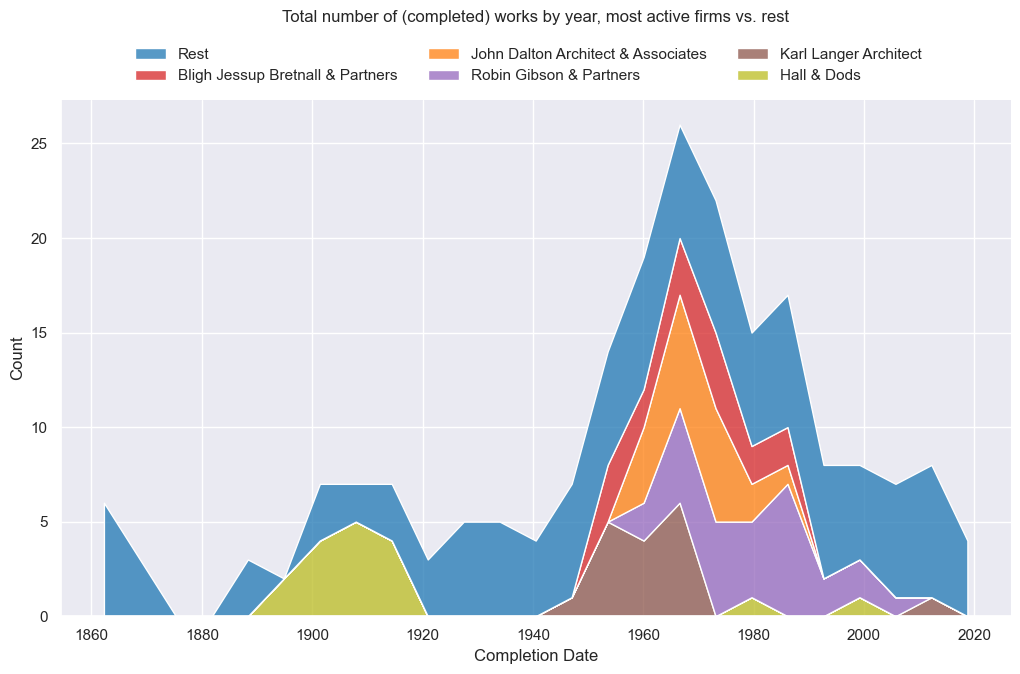

In [47]:
# total five (individually) vs rest over time
sns.set(rc={'figure.figsize':(12,6)})

# ee_df["objectcompletion_asdt"] = ee_df["objectcompletion"].apply(func)

ee_df["objectcompletion_asdt"] = ee_df["objectcompletion"].apply(lambda x: x[0:4])
ee_df["objectcompletion_asdt"] = ee_df["objectcompletion_asdt"]\
.apply(lambda x: datetime.strptime(x, '%Y'))

rest_completions = ee_df[~ee_df['label_x']\
                        .isin(topfour_arch)]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
rest_completions[''] = 'Rest'

bjb_completions = ee_df[ee_df['label_x']\
                        .isin(['Bligh Jessup Bretnall & Partners'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
bjb_completions[''] = 'Bligh Jessup Bretnall & Partners'

jd_completions = ee_df[ee_df['label_x']\
                        .isin(['John Dalton Architect & Associates'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
jd_completions[''] = 'John Dalton Architect & Associates'

rg_completions = ee_df[ee_df['label_x']\
                        .isin(['Robin Gibson & Partners'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
rg_completions[''] = 'Robin Gibson & Partners'

kla_completions = ee_df[ee_df['label_x']\
                        .isin(['Karl Langer Architect'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
kla_completions[''] = 'Karl Langer Architect'

hd_completions = ee_df[ee_df['label_x']\
                        .isin(['Hall & Dods'])]['objectcompletion_asdt']\
                        .value_counts()\
                        .reset_index()\
                        .rename({'index':'Completion Date',
                                 'objectcompletion_asdt':'Frequency'}, axis=1)\
                        .sort_values('Completion Date')
hd_completions[''] = 'Hall & Dods'

color_dict = {'Bligh Jessup Bretnall & Partners': to_rgba('tab:red', 0.3),
              'Robin Gibson & Partners': to_rgba('tab:purple', 0.3),
              'John Dalton Architect & Associates': to_rgba('tab:orange', 0.3),
              'Karl Langer Architect': to_rgba('tab:brown', 0.3),
              'Hall & Dods': to_rgba('tab:olive', 0.3),
              'Rest': to_rgba('tab:blue', 0.1)}

allcompletions = rest_completions.append(bjb_completions)
allcompletions = allcompletions.append(jd_completions)
allcompletions = allcompletions.append(rg_completions)
allcompletions = allcompletions.append(kla_completions)
allcompletions = allcompletions.append(hd_completions)

ax = sns.displot(allcompletions, x='Completion Date', kind='hist',bins=25,height=6,aspect=1.75,
            hue="", fill=True, palette = color_dict, element="poly", multiple="stack")

sns.move_legend(ax, "upper center", ncol=3, bbox_to_anchor=(0.4, 1.08))
plt.title('Total number of (completed) works by year, most active firms vs. rest\n\n\n\n')
plt.show()

#### Person and organisation relationships

In [48]:
# daqa_person_orgs.head(1).T
daqa_person_orgs = df_daqa_relationship[df_daqa_relationship['relation_class']\
                         .isin(['Person_Relatedorganization'])]

print(f'There are {daqa_person_orgs.shape[0]} person-organisation relation records.')

There are 1468 person-organisation relation records.


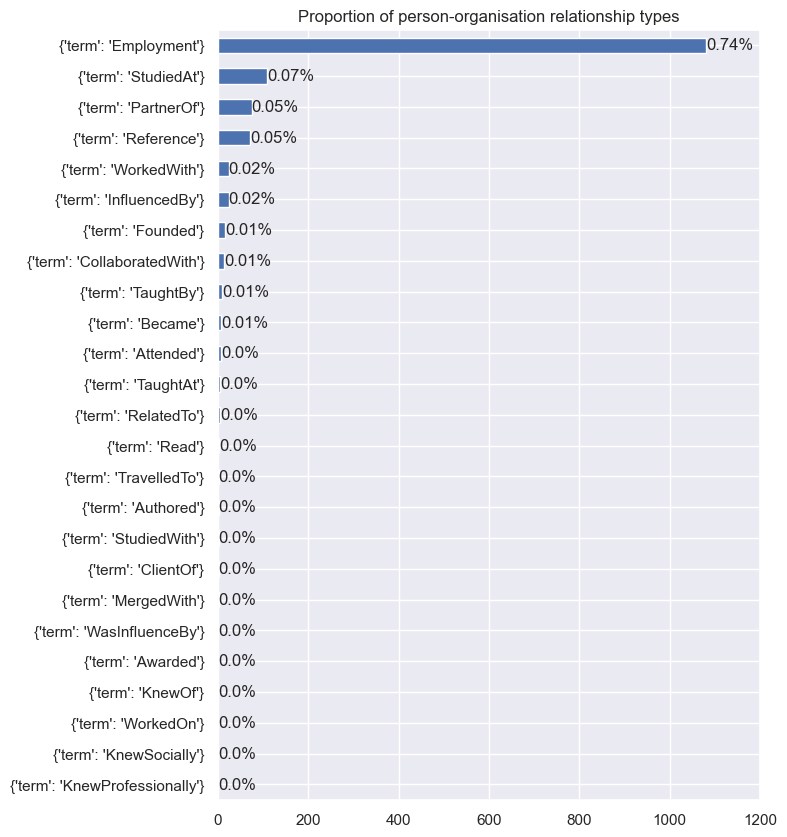

In [49]:
# bar chart of predicate type for person/org relationships
df = pd.DataFrame(
        daqa_person_orgs\
        .predicate.value_counts()\
        .reset_index())\
        .rename({'index':'Predicate',
                 'predicate':'Frequency'}, axis=1)\
        .sort_values('Frequency')

# ee_freq = pd.DataFrame(ee_df_last['school.qualification2'].value_counts())
# print(ee_freq.T,'\n')

labels = (df['Frequency']/daqa_person_orgs.shape[0])\
        .round(2).astype('str') + '%'

sns.set(rc={'figure.figsize':(7,10)})
ax = df.plot.barh(x='Predicate', y='Frequency',rot=0)

# add bar labels
[ax.bar_label(container, labels=labels) 
 for container in ax.containers]

# remove legend and y-axis title
ax.legend().set_visible(False)
plt.ylabel(None)

plt.xlim([0, 1200])
plt.title('Proportion of person-organisation relationship types')
plt.show()

There are 299 person-organisation relation records with date data.

              mean       std  min  25%  50%  75%   max
yeardiff  6.926421  9.521149  0.0  2.0  3.0  7.0  52.0


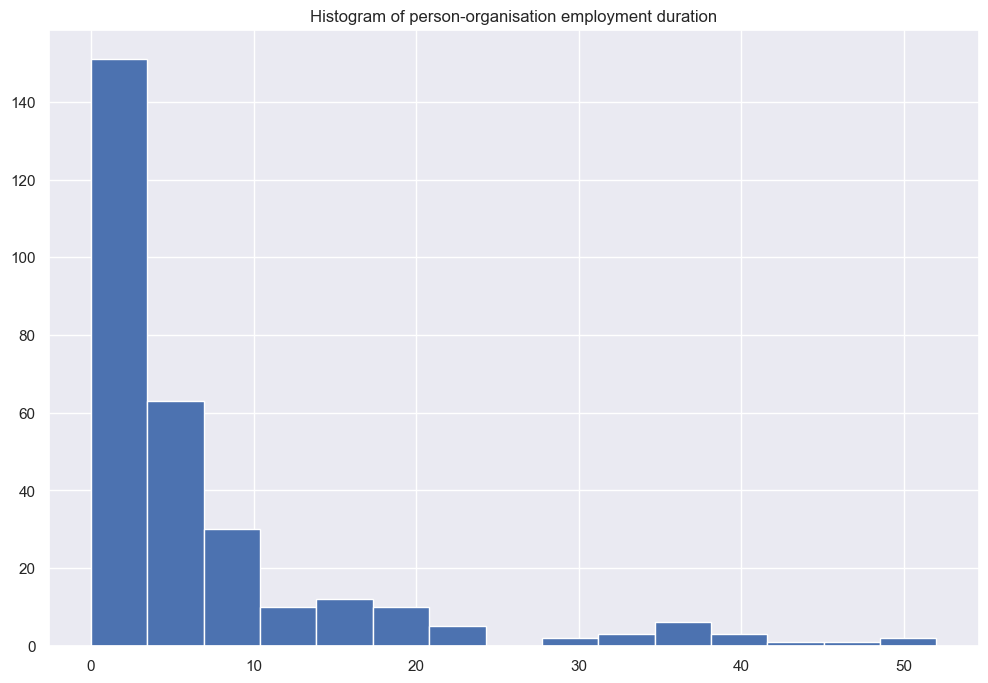

In [50]:
# Employment summary
sns.set(rc={'figure.figsize':(12,8)})
daqa_person_orgs['yeardiff'] = daqa_person_orgs['untilyear'] - daqa_person_orgs['fromyear']
daqa_person_orgs_pos = daqa_person_orgs[~daqa_person_orgs['yeardiff'].isnull()]
daqa_person_orgs_pos = daqa_person_orgs_pos[daqa_person_orgs_pos['yeardiff'] >= 0]

print(f'There are {daqa_person_orgs_pos.shape[0]} person-organisation relation records with date data.\n')
print(pd.DataFrame(daqa_person_orgs_pos['yeardiff'].describe()[['mean','std','min','25%','50%','75%','max']]).T)
daqa_person_orgs_pos['yeardiff'].hist(bins=15)

plt.title('Histogram of person-organisation employment duration')
plt.show()